<center><h1>Analysis of the NCAA Basketball Overall Performance </h1>
 <h2>by Shengwei Peng, Jake Miller and Roy Slowiak</h2> </center>

<p>Import libraries so that we are able to use functions from the library</p>

In [6]:
from bs4 import BeautifulSoup
import requests

# import statements
%matplotlib inline 
import matplotlib.pyplot as plt 
# Import matplotlib for graphs and visualizations
# lets you plot inside the notebook
import networkx as nx # analysis for networks
import pandas as pd # analysis for csv type data
import numpy as np # analysis for matrices and vectors
import pickle # convenient way to save data
import random



<center><h2>Data collection and extraction</h2></center>
<p>
We got our data from sportsreferance.com. The reason for this was not only because the professor used this site in his example, but also because all the data was stored in an easy to work with table. Using the provided table proved to work well because we got relatively clean data the first time we parsed through our data set.<br>
The web site of the NCAA Team data(https://www.sports-reference.com/cbb/seasons/2009-advanced-school-stats.html contains
2008-09 College Basketball Advanced School Stats. And we can modify the number 2009 as we needed if we are looking for another season.
</p>

<center><h2>Crawler</h2></center> <p></p>
Crawler: Our crawler here is rather simple and easy to use. What we did is created a function that reads the URL function and returns the contents of the web page as a string. The reason why we did this is that it is straightforward to work with a large string and clean up data rather than a different method. Additionally, our group learned this method while taking I210 & I211, so it made sense to use it here as well. Once we receive our data in string format, we pass it on to our parser to clean and sort the data into a table. 

In [7]:
base_url = 'https://www.sports-reference.com'

# Function to
def fetch_url(url):
    # Fetch a url and return it contents as a string"""

    uf = requests.get(url)
    return (uf.text)

In [8]:
# Function to
def scrape_data(yr):
    
    # get input year and get the data from sepcific page
    url_content = fetch_url('%s/cbb/seasons/%s-advanced-school-stats.html' % (base_url, yr))
    soup = BeautifulSoup(url_content, "lxml")

    # get the table
    rows = soup.find_all('tr')

    # a list to store histogram. Ex. hist[1] = [['akron', '.639','17.5' ]]
    data = []
    for row in rows:
        
        columns = row.find_all('td')
        if len(columns) > 4:
            metrics = [(columns[0].get_text().rstrip('\xa0NCAA')), (columns[1].get_text()), (columns[2].get_text()), (columns[4].get_text()),
                        (columns[5].get_text()),(columns[20].get_text())]
            data.append(metrics)
    print(data)
    return data

#add more year to list  to show more        
years = ['2006', '2010','2018']
data = {}

for yr in years:
    data[yr] = scrape_data(yr)

##compute cumulative distribution
def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(norm/float(len(sorted_data)+1.0))
    return x, cx

[['Air Force', '31', '24', '.774', '10.20', '.609'], ['Akron', '33', '23', '.697', '5.00', '.560'], ['Alabama A&M', '26', '13', '.500', '-9.12', '.500'], ['Alabama-Birmingham', '31', '24', '.774', '9.64', '.539'], ['Alabama State', '30', '12', '.400', '-12.98', '.493'], ['Alabama', '31', '18', '.581', '10.79', '.547'], ['Albany (NY)', '32', '21', '.656', '-0.44', '.553'], ['Alcorn State', '28', '8', '.286', '-15.11', '.509'], ['American', '29', '12', '.414', '-8.49', '.505'], ['Appalachian State', '30', '14', '.467', '-7.61', '.535'], ['Arizona State', '28', '11', '.393', '4.36', '.525'], ['Arizona', '33', '20', '.606', '15.12', '.517'], ['Little Rock', '29', '14', '.483', '-4.67', '.499'], ['Arkansas-Pine Bluff', '29', '13', '.448', '-12.48', '.487'], ['Arkansas State', '30', '12', '.400', '-5.49', '.545'], ['Arkansas', '32', '22', '.688', '15.01', '.541'], ['Army', '27', '5', '.185', '-19.89', '.491'], ['Auburn', '28', '12', '.429', '4.92', '.522'], ['Austin Peay', '31', '17', '.548'

<center><h2>Parser</h2></center><p></p>
Parser: Once we found our data and stored it in string format, it is time to parse through it and organize it for further use. For our project, we created a function that takes the raw data from the crawler and looks for 'tr' and 'td' tags. Additionally, we used beautiful soup (BS) to help us out with the part of the project. The reason for this is because BS is robust, reliable, and easy on our CPU. We decided we were going to look at total games, wins, win/loss record, true-shooting percentage, and simple rating system. We felt these points of data were not only important on deciding what team might win a game from a statistic perspective, but also these pieces of data are generally not covered when looking into predictive statistics. After we selected what data we were going to look at and parsed through it, we then needed to add more data, so we specified what years we would be looking at. We selected the year 2006, 2010, and 2018. 2006 was the last year of the one and done era, which means that no player can go straight from high school to the NBA. Players such as Lebron James and Kobe Bryant would be forced to attend college or go overseas for one year before entering the league. This fact might force better players to play in the NCAA for at least a year, which might have a dramatic impact on the statistics. We also decided to look at 2010 and 2018 because they are excellent midpoints in time. Once we collected all the data we needed to create the visuals, it was time to pass such data to the next step. 

2006 is red line
2010 is blue line
2018 is green line


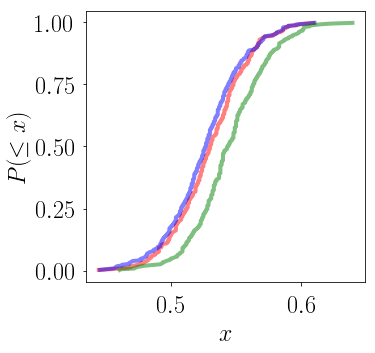

In [5]:
#2013
##generate data for experiments
outcomes = []
outcomes2 = []
outcomes3 = []

for entry in data['2006']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes.append(r)


    
x, cx = cumulative_from_data (outcomes)

for entry in data['2010']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes2.append(r)


    
x1, cx1 = cumulative_from_data (outcomes2)

for entry in data['2018']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes3.append(r)


    
x2, cx2 = cumulative_from_data (outcomes3)
##


##
plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.xlabel('$x$')
plt.ylabel('$P(\\leq x)$')
print ('2006 is red line')
print ('2010 is blue line')
print ('2018 is green line')
plt.plot(x, cx, color = 'red', linewidth=4.0, alpha=0.5)
plt.plot(x1, cx1, color = 'blue', linewidth=4.0, alpha=0.5)
plt.plot(x2, cx2, color = 'green', linewidth=4.0, alpha=0.5)
plt.show()

<center><h2>Data Analysis & Visualisations</h2></center> <p></p>

From the histogram, This graph analyzes true shooting % of every college basketball team in the years 2006, 2010, and 2018. True shooting % define as a measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws. As we can see, there is a higher average true shooting % in 2018. Since there are many factors, which could lead to a higher average in true shooting, we couldn’t conclude the causes. We may need to study more data.

From the histogram, Teams with a higher simple rating tend to win more games, and there is a high correlation between the two. From 2006 to 2018, simple rating system tends to be slightly higher from year to year. Lastly, a higher simple rating shows a strong correlation to winning games.

<center><h2>Interpretation & Conclusions</h2></center> <p></p>
After looking at the collected data and visualizations, we have made some sense of the results. From the histogram, True shooting % has increased since the end of the 1 and done rule. Players staying and playing college basketball has made for better competition and results. From the scatter plot, a team with a higher simple rating figure tends to win more games. This statistic looks at average point differential and strength of schedule. Additionally, From 2006 to 2018, total simple rating tends to be higher for almost every team. This might be due to the end of the one and done era. This is because players with a higher skill level were required to stay in the NCAA for one year, causing a skew of the data. And lastly, the simple rating shows a strong correlation to winning basketball games. While these are just some general results that we found, we find it interesting that the simple rating system has such a predictive property, yet is not looked at when predicting games. There are still many different statistic points that need to be looked at to further our findings, but that will have to be saved for another time.